# Image Classification of MNIST Fashion using a Multilayer Perceptron

Example followed from https://www.tensorflow.org/tutorials/keras/classification.

In [64]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [65]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize the data between 0-1
x_train = x_train / 255.0
x_test = x_test / 255.0

# List of corresponding class names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [66]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


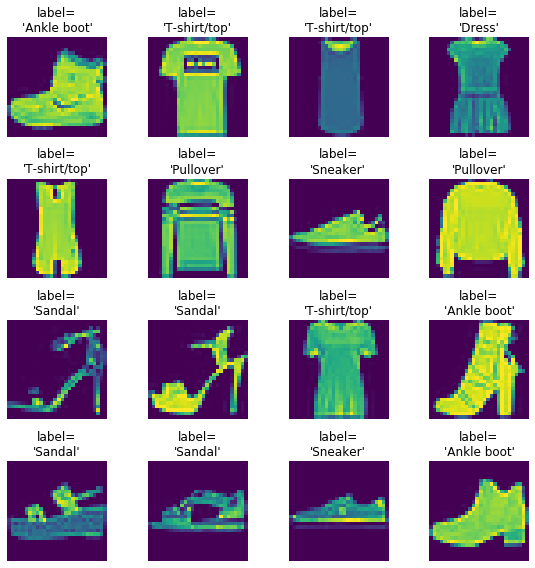

In [67]:
plt.figure(figsize=(8,8))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(x_train[i])
    plt.axis("off")
    plt.title("label=\n'{}'".format(class_names[y_train[i]]))
# plt.suptitle("Example Training Images")
plt.tight_layout()
plt.show()

In [68]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10))

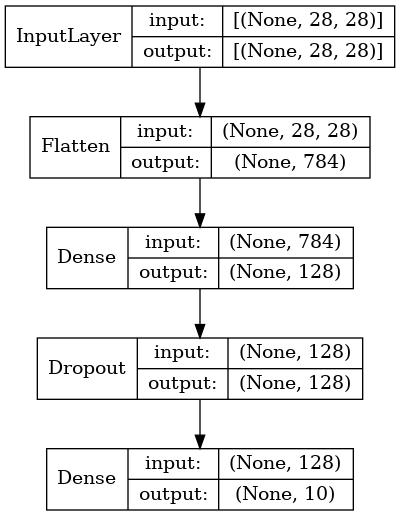

In [69]:
tf.keras.utils.plot_model(model, to_file="/tmp/model.png", show_shapes=True, show_layer_names=False)

In [70]:
# Examine the raw "logit" score of the untrained model for each class
predictions = model(x_train[0:1]).numpy()
predictions

array([[ 1.1753587 , -1.9645143 ,  0.49074507,  1.0162283 , -1.0780077 ,
         0.48154396, -1.3109925 , -0.16818814, -0.49606472, -0.86646867]],
      dtype=float32)

In [71]:
# Convert the "logit" scores into probabilities
tf.nn.softmax(predictions).numpy()

array([[0.2726971 , 0.01180459, 0.13751706, 0.2325793 , 0.02864547,
        0.13625756, 0.02269196, 0.07115175, 0.05126141, 0.03539372]],
      dtype=float32)

In [72]:
loss_func = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

loss_func(y_train[0:1], predictions).numpy()

3.3412209

In [73]:
model.compile(optimizer="adam", loss=loss_func, metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5602 - accuracy: 0.8025 - val_loss: 0.4248 - val_accuracy: 0.8463
Epoch 2/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4126 - accuracy: 0.8508 - val_loss: 0.3691 - val_accuracy: 0.8681
Epoch 3/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3772 - accuracy: 0.8622 - val_loss: 0.3648 - val_accuracy: 0.8676
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3534 - accuracy: 0.8694 - val_loss: 0.3487 - val_accuracy: 0.8723
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3393 - accuracy: 0.8744 - val_loss: 0.3419 - val_accuracy: 0.8773


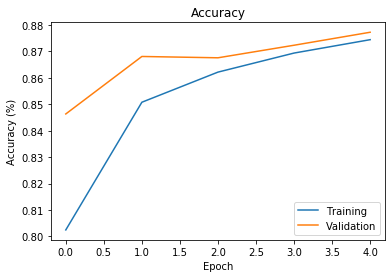

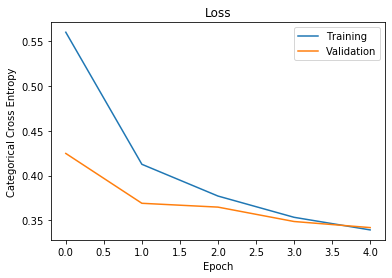

In [74]:
plt.figure()
plt.plot(history.history["accuracy"], label="Training")
plt.plot(history.history["val_accuracy"], label="Validation")
plt.title("Accuracy")
plt.ylabel("Accuracy (%)")
plt.xlabel("Epoch")
plt.legend()

plt.figure()
plt.plot(history.history["loss"], label="Training")
plt.plot(history.history["val_loss"], label="Validation")
plt.title("Loss")
plt.ylabel("Categorical Cross Entropy")
plt.xlabel("Epoch")
plt.legend()

plt.show()

In [75]:
model.evaluate(x_train, y_train, verbose=2)

1875/1875 - 2s - loss: 0.3015 - accuracy: 0.8886


[0.3015303909778595, 0.8885666728019714]

In [76]:
model(x_test[0:1])

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[ -9.747864  , -10.251684  ,  -7.813647  ,  -9.556928  ,
        -10.017591  ,   0.29900384,  -6.628868  ,   2.4244668 ,
         -5.7111845 ,   4.5624657 ]], dtype=float32)>

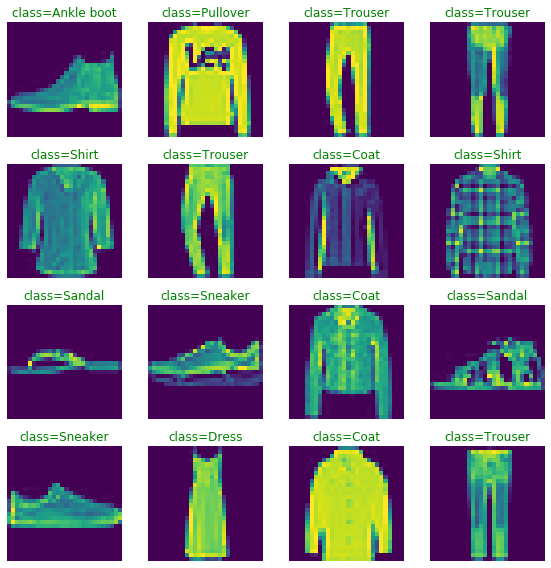

In [79]:
plt.figure(figsize=(8,8))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(x_test[i])
    plt.axis("off")
    classification = np.argmax(model(x_test[i:i+1]))
    color = "g" if classification == y_test[i] else "r"
    plt.title("class={}".format(class_names[classification]), fontdict={"color": color})
# plt.suptitle("Example Test Images")
plt.tight_layout()
plt.show()